<a href="https://colab.research.google.com/github/JuniorHZ19/ArquitecturasCNN/blob/main/Manejo_Imagen_Torch_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dimensiones pil: (225, 224)
Dimensiones opencv (224, 225, 3)


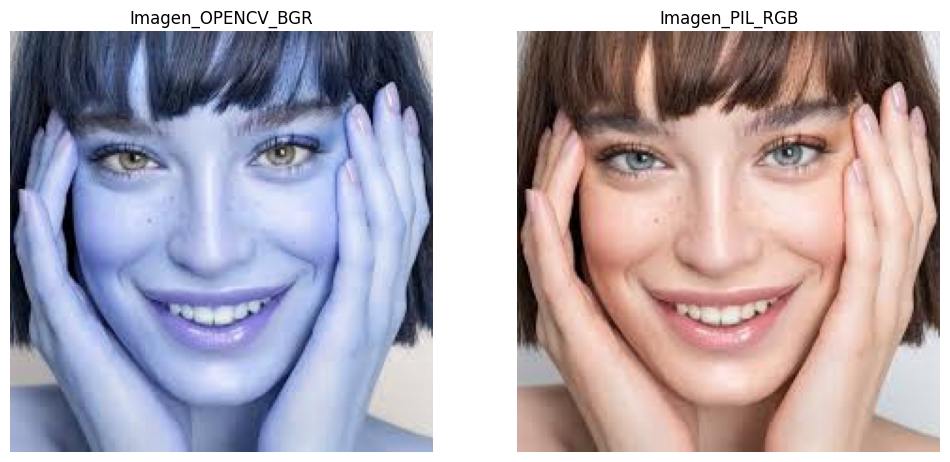

In [7]:
from PIL import Image

import matplotlib.pyplot as plt
image_path = 'cara.jpg'

img_pil = Image.open(image_path)

print('Dimensiones pil:',img_pil.size)


import cv2

image_path = 'cara.jpg'
img_cv = cv2.imread(image_path)

print('Dimensiones opencv',img_cv.shape)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila, 2 columnas


# Primera Imagen
axes[0].imshow(img_cv)
axes[0].axis('off')
axes[0].set_title('Imagen_OPENCV_BGR')

# Segunda Imagen
axes[1].imshow(img_pil)
axes[1].axis('off')  # Ocultar los ejes
axes[1].set_title('Imagen_PIL_RGB')  # Título de la imagen 2

# Mostrar la ventana
plt.show()


In [10]:
#PASAR FORMATO A  TENSOR (CANALES,HIGHT,WEIGHT):

from PIL import Image

from torchvision import transforms

transform = transforms.ToTensor()



img_pil = Image.open('cara.jpg')

pil_2_tensor=transform(img_pil)

print('Dimensiones pil->tensor',pil_2_tensor.shape)


import cv2


image_path = 'cara.jpg'

img_cv = cv2.imread(image_path)

opencv_2_tensor=transform(img_cv)

print('Dimensiones opencv->tensor',opencv_2_tensor.shape)





Dimensiones pil->tensor torch.Size([3, 224, 225])
Dimensiones opencv->tensor torch.Size([3, 224, 225])


Dimensiones pil->tensor <PIL.Image.Image image mode=RGB size=225x224 at 0x7ED1943284C0>
Dimensiones opencv->tensor torch.Size([3, 224, 225])


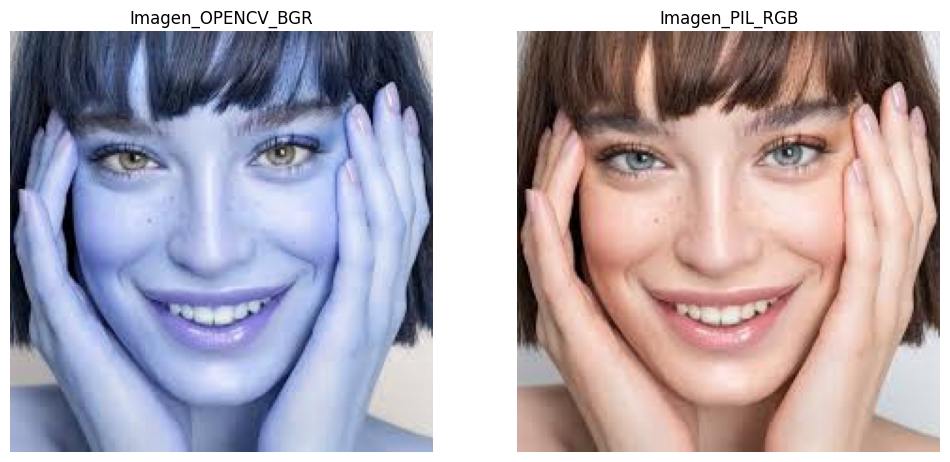

In [25]:
#REVERTIR :

from PIL import Image

from torchvision import transforms


transform = transforms.ToTensor()



img_pil = Image.open('cara.jpg')

pil_2_tensor=transform(img_pil)

pil_desnormalizado=(pil_2_tensor * 255).byte()

to_pil = transforms.ToPILImage()

pil=to_pil(pil_desnormalizado)


print('Dimensiones pil->tensor',pil)


import cv2


image_path = 'cara.jpg'

img_cv = cv2.imread(image_path)

opencv_2_tensor=transform(img_cv)

image_tensor_desnormalizado = opencv_2_tensor * 255

image_tensor_desnormalizado = image_tensor_desnormalizado.permute(1, 2, 0).byte()  # Cambiar dimensiones y convertir a uint8

# Convertir a un array de NumPy
image_np = image_tensor_desnormalizado.numpy()



print('Dimensiones opencv->tensor',opencv_2_tensor.shape)


fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila, 2 columnas


# Primera Imagen
axes[0].imshow(image_np)
axes[0].axis('off')
axes[0].set_title('Imagen_OPENCV_BGR')

# Segunda Imagen
axes[1].imshow(pil)
axes[1].axis('off')  # Ocultar los ejes
axes[1].set_title('Imagen_PIL_RGB')  # Título de la imagen 2

# Mostrar la ventana
plt.show()



In [31]:
#Normalizacion aplicada a un dataset imagenet:

from PIL import Image
import torch
from torchvision import transforms

from torchvision import transforms

transform = transforms.ToTensor()



img_pil = Image.open('cara.jpg')

tensor_imagen=transform(img_pil)



normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

# Normalizar la imagen
image_tensor_normalized = normalize(tensor_imagen)

print(image_tensor_normalized)



# Desnormalizar la imagen

def denormalize(tensor, mean, std):
    mean = torch.tensor(mean).view(-1, 1, 1)
    std = torch.tensor(std).view(-1, 1, 1)
    return tensor * std + mean

image_tensor_denormalized = denormalize(image_tensor_normalized, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
print(tensor_imagen)
print(image_tensor_denormalized)


tensor([[[0.7933, 1.2728, 0.9988,  ..., 1.7009, 1.7694, 1.7180],
         [0.8789, 1.1358, 0.9303,  ..., 1.7865, 1.9235, 1.6324],
         [1.0159, 0.9474, 0.8276,  ..., 1.7694, 1.8893, 1.6838],
         ...,
         [1.5125, 1.5125, 1.4954,  ..., 1.4440, 1.4440, 1.4440],
         [1.5297, 1.5297, 1.5125,  ..., 1.5297, 1.5297, 1.4098],
         [1.5297, 1.5297, 1.5125,  ..., 1.5639, 1.5468, 1.4783]],

        [[0.9405, 1.4307, 1.0805,  ..., 1.8158, 1.9209, 1.8683],
         [1.0280, 1.2906, 1.0105,  ..., 1.9034, 2.0784, 1.7808],
         [1.1681, 1.0980, 0.9055,  ..., 1.8859, 2.0434, 1.8333],
         ...,
         [1.0455, 1.0455, 1.0280,  ..., 1.0280, 1.0280, 1.0280],
         [1.0630, 1.0630, 1.0455,  ..., 1.0805, 1.0805, 0.9930],
         [1.0630, 1.0630, 1.0455,  ..., 1.0805, 1.0980, 1.0630]],

        [[1.1585, 1.6117, 1.2805,  ..., 2.2217, 2.2740, 2.2217],
         [1.2457, 1.4722, 1.2108,  ..., 2.3088, 2.4308, 2.1346],
         [1.3851, 1.2805, 1.1062,  ..., 2.2914, 2.3960, 2.

In [ ]:
pip install torch torchvision